# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict the car accidents in the UK. The data that we have ranges from 1969 to 1984.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import statsmodels as sm
from matplotlib import pyplot as plt
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(mat.__version__)



1.18.4
1.0.3
0.10.1
3.2.1


In [2]:
import os
os.chdir('E:\AIMLGLIM\TIME_SERIES_FORECASTING\week3')
os.getcwd()

'E:\\AIMLGLIM\\TIME_SERIES_FORECASTING\\week3'

## Read the data from the '.csv' file as a monthly Time Series.

In [3]:
df = pd.read_csv('Seatbelts.csv')
df.head()

,Unnamed: 0,DriversKilled,kms,PetrolPrice
0,1,107,9059,0.102972
1,2,97,7685,0.102363
2,3,102,9963,0.102062
3,4,87,10955,0.100873
4,5,119,11823,0.101020


In [4]:
df.drop(labels='Unnamed: 0',inplace=True,axis=1)
df.head()

,DriversKilled,kms,PetrolPrice
0,107,9059,0.102972
1,97,7685,0.102363
2,102,9963,0.102062
3,87,10955,0.100873
4,119,11823,0.101020


In [5]:
df.tail()

,DriversKilled,kms,PetrolPrice
187,96,21626,0.114797
188,122,20195,0.114093
189,120,19928,0.116466
190,137,18564,0.116026
191,154,18149,0.116067


In [6]:
date = pd.date_range(start='1/1/1969', end='1/1/1985', freq='M')
date

DatetimeIndex(['1969-01-31', '1969-02-28', '1969-03-31', '1969-04-30',
               '1969-05-31', '1969-06-30', '1969-07-31', '1969-08-31',
               '1969-09-30', '1969-10-31',
               ...
               '1984-03-31', '1984-04-30', '1984-05-31', '1984-06-30',
               '1984-07-31', '1984-08-31', '1984-09-30', '1984-10-31',
               '1984-11-30', '1984-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [7]:
len(date)

192

In [8]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,DriversKilled,kms,PetrolPrice,Time_Stamp
0,107,9059,0.102972,1969-01-31
1,97,7685,0.102363,1969-02-28
2,102,9963,0.102062,1969-03-31
3,87,10955,0.100873,1969-04-30
4,119,11823,0.101020,1969-05-31


In [9]:
df.set_index(keys='Time_Stamp',inplace=True,drop=True)
df.head()

,DriversKilled,kms,PetrolPrice
Time_Stamp,,,
1969-01-31,107,9059,0.102972
1969-02-28,97,7685,0.102363
1969-03-31,102,9963,0.102062
1969-04-30,87,10955,0.100873
1969-05-31,119,11823,0.101020


## Plot the Time Series to understand the behaviour of the data.

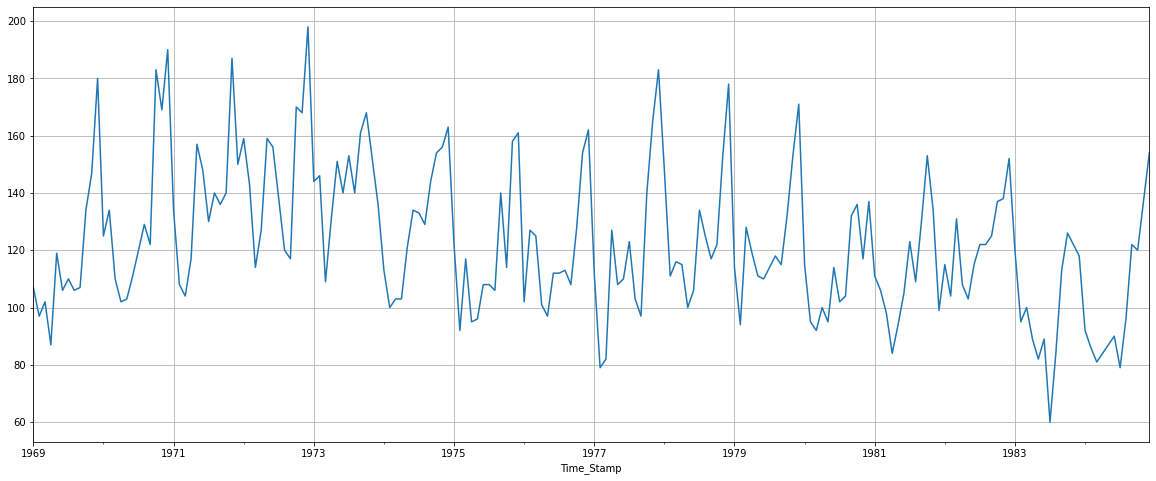

In [22]:
df['DriversKilled'].plot(figsize=(20,8))
plt.grid();

## Check the basic measures of descriptive statistics

In [23]:
df[df.columns[0:3]].describe()

,DriversKilled,kms,PetrolPrice
count,192.000000,192.000000,192.000000
mean,122.802083,14993.604167,0.103624
std,25.379886,2938.049207,0.012176
min,60.000000,7685.000000,0.081179
25%,104.750000,12685.000000,0.092577
50%,118.500000,14987.000000,0.104477
75%,138.000000,17202.500000,0.114056
max,198.000000,21626.000000,0.133027


## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

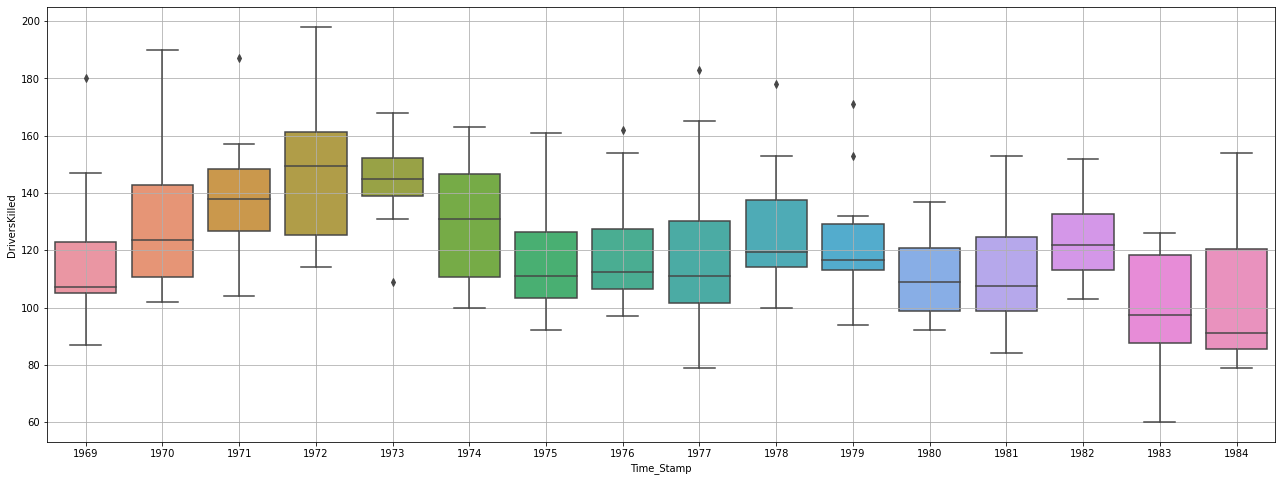

In [24]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df['DriversKilled'],ax=ax)
plt.grid();

### Monthly Plot

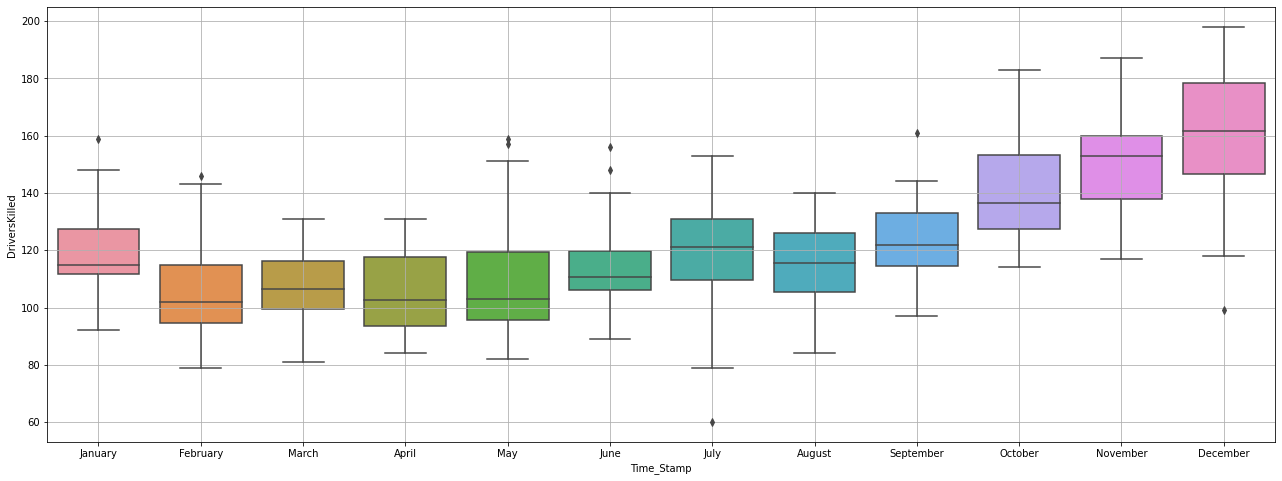

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df['DriversKilled'],ax=ax)
plt.grid();

There is a clear distinction of 'DriversKilled' within different months spread across various years. The highest such numbers are being recorded in the month of December across various years.

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

In [26]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

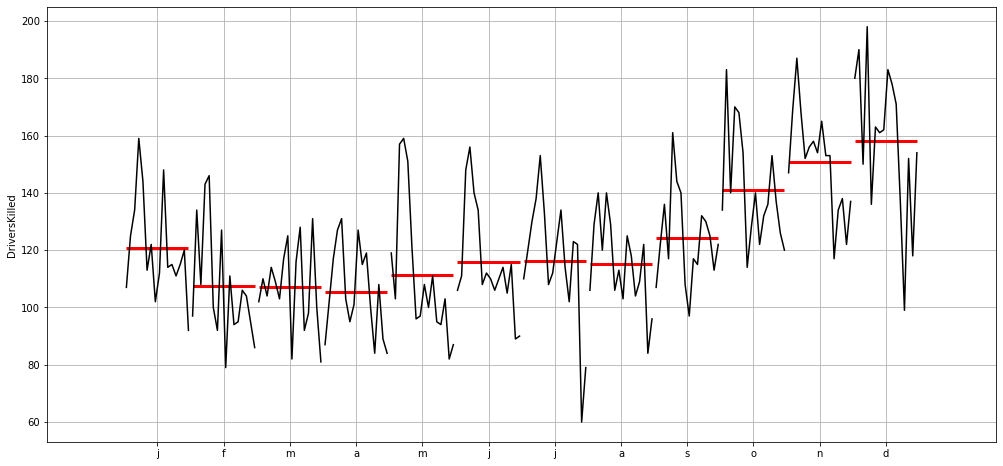

In [27]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['DriversKilled'],ylabel='DriversKilled')
plt.grid();

## Plot a graph of monthly accidents across years.

In [28]:
monthly_sales_across_years = pd.pivot_table(df, values = 'DriversKilled', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1969,107,97,102,87,119,106,110,106,107,134,147,180
1970,125,134,110,102,103,111,120,129,122,183,169,190
1971,134,108,104,117,157,148,130,140,136,140,187,150
1972,159,143,114,127,159,156,138,120,117,170,168,198
1973,144,146,109,131,151,140,153,140,161,168,152,136
1974,113,100,103,103,121,134,133,129,144,154,156,163
1975,122,92,117,95,96,108,108,106,140,114,158,161
1976,102,127,125,101,97,112,112,113,108,128,154,162
1977,112,79,82,127,108,110,123,103,97,140,165,183


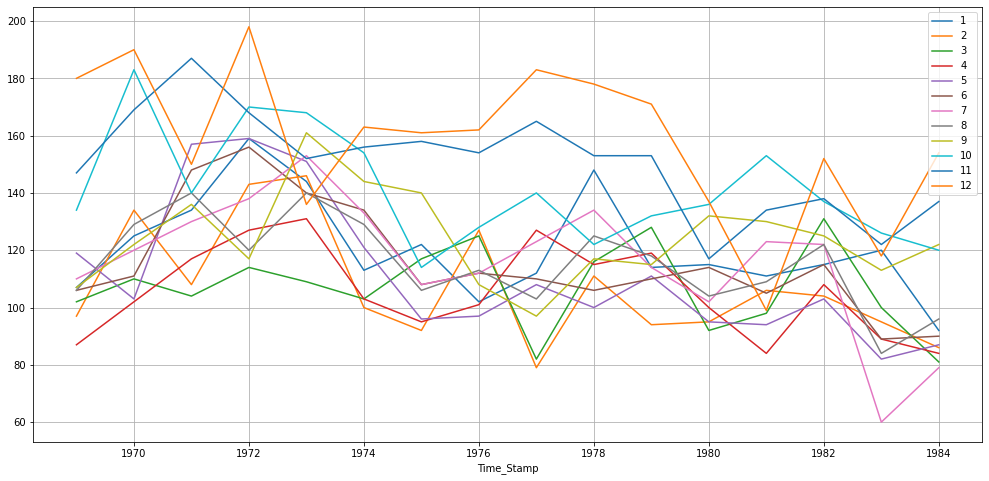

In [29]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

As seen from the boxplot as well, there is a some degree of irregularity among these accidents across various years for different months.

## Plot the Empirical Cumulative Distribution.

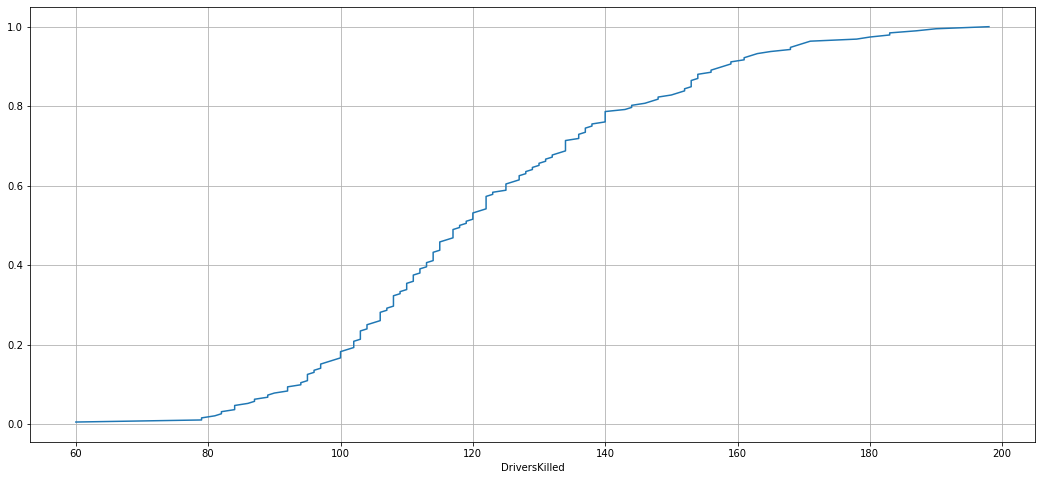

In [30]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['DriversKilled'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('DriversKilled');

## Check the correlation between the various variables.

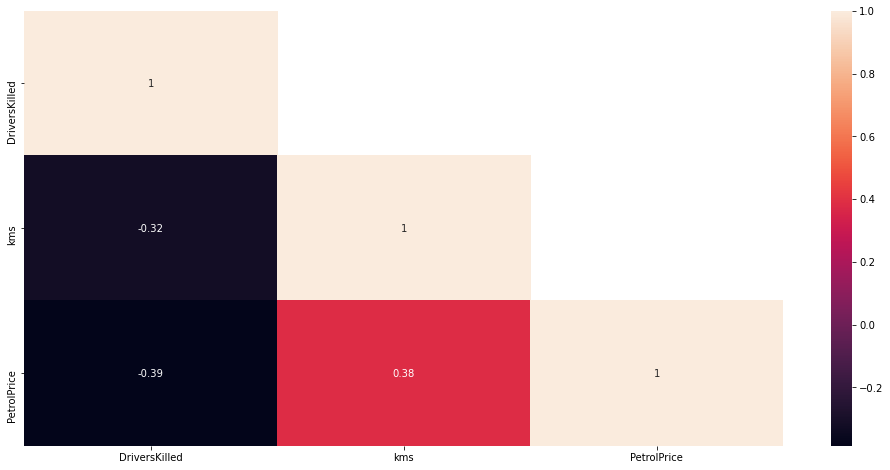

In [31]:
plt.figure()
sns.heatmap(df[df.columns[0:3]].corr(),annot=True,mask = np.triu(df[df.columns[0:3]].corr(),+1));

## Plot the average Driver accidents per month and the month on month percentage change of Driver accidents.

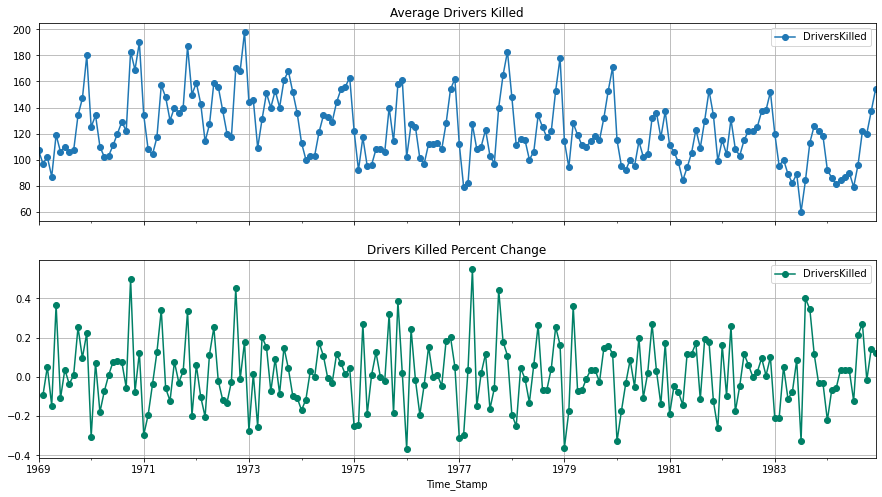

In [32]:
# group by date and get average Customers, and precent change
average    = df.groupby(df.index)["DriversKilled"].mean()
pct_change = df.groupby(df.index)["DriversKilled"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Drivers Killed",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Drivers Killed Percent Change",grid=True)

## Plot the variables with respect to a month on month percentage change to understand the change of different variables on the 'DriversKilled' variable.

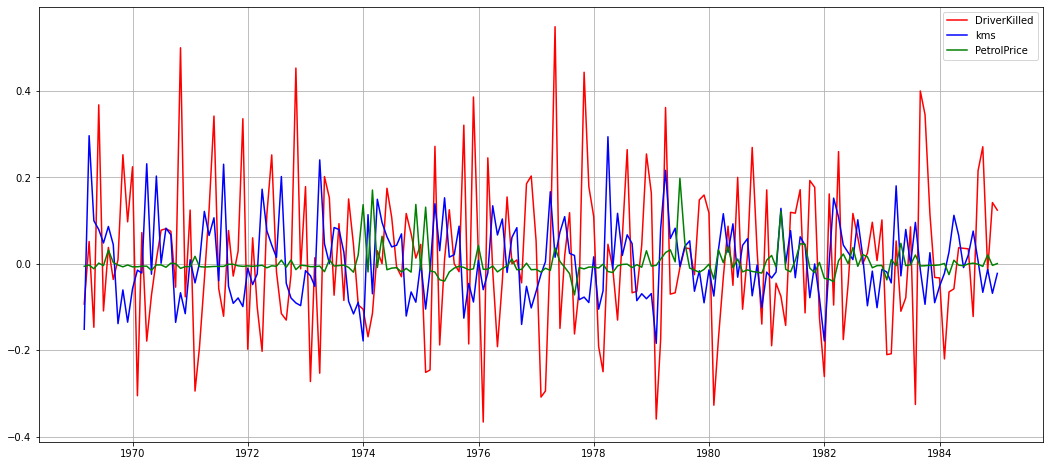

In [33]:
plt.figure(figsize=(18,8))

plt.plot(df.groupby(df.index)["DriversKilled"].sum().pct_change(),label='DriverKilled',color='Red')
plt.plot(df.groupby(df.index)["kms"].sum().pct_change(),label='kms',color='Blue')
plt.plot(df.groupby(df.index)["PetrolPrice"].sum().pct_change(),label='PetrolPrice',color='Green')

plt.legend(loc='best')
plt.grid();

## Decompose the Time Series and plot the different components.

In [34]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

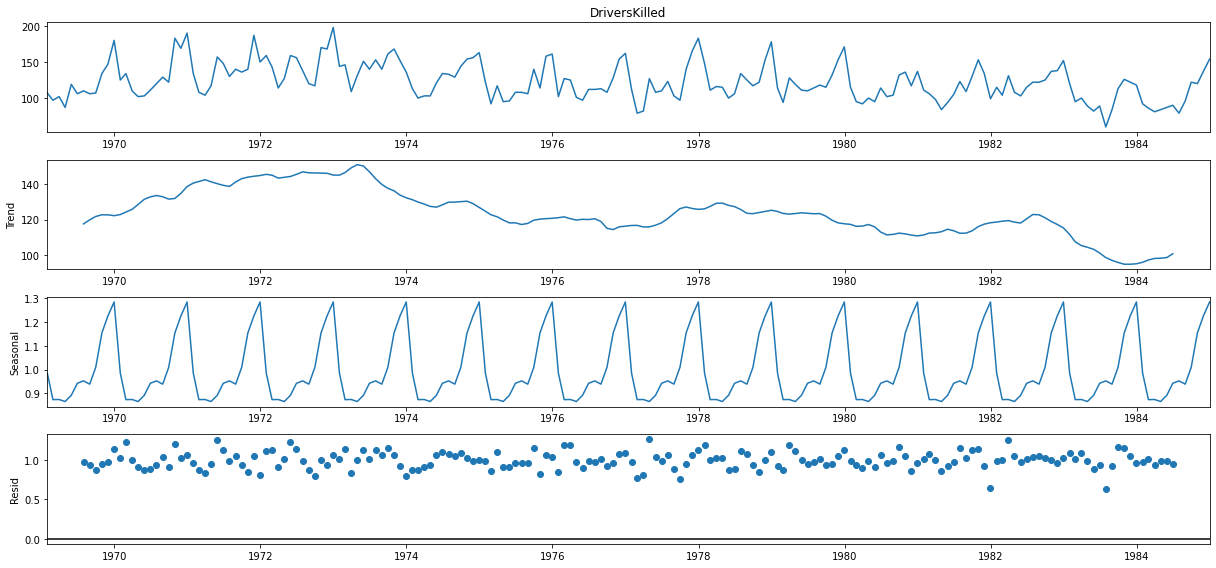

In [35]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df['DriversKilled'],model='multiplicative')
decomposition.plot();

In [36]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1969-01-31           NaN
1969-02-28           NaN
1969-03-31           NaN
1969-04-30           NaN
1969-05-31           NaN
1969-06-30           NaN
1969-07-31    117.583333
1969-08-31    119.875000
1969-09-30    121.750000
1969-10-31    122.708333
1969-11-30    122.666667
1969-12-31    122.208333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1969-01-31    0.985320
1969-02-28    0.874071
1969-03-31    0.874566
1969-04-30    0.866101
1969-05-31    0.892273
1969-06-30    0.942657
1969-07-31    0.952756
1969-08-31    0.939088
1969-09-30    1.009579
1969-10-31    1.154123
1969-11-30    1.225420
1969-12-31    1.284046
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1969-01-31         NaN
1969-02-28         NaN
1969-03-31         NaN
1969-04-30         NaN
1969-05-31         NaN
1969-06-30         NaN
1969-07-31    0.981896
1969-08-31    0.941610
1969-09-30    0.870511
1969-10-31    0.946191
1969-11-30    0.977925
1969-12-31    1.147073
Name: resid, dtype:

## Check for stationarity of the whole Time Series data.

In [37]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

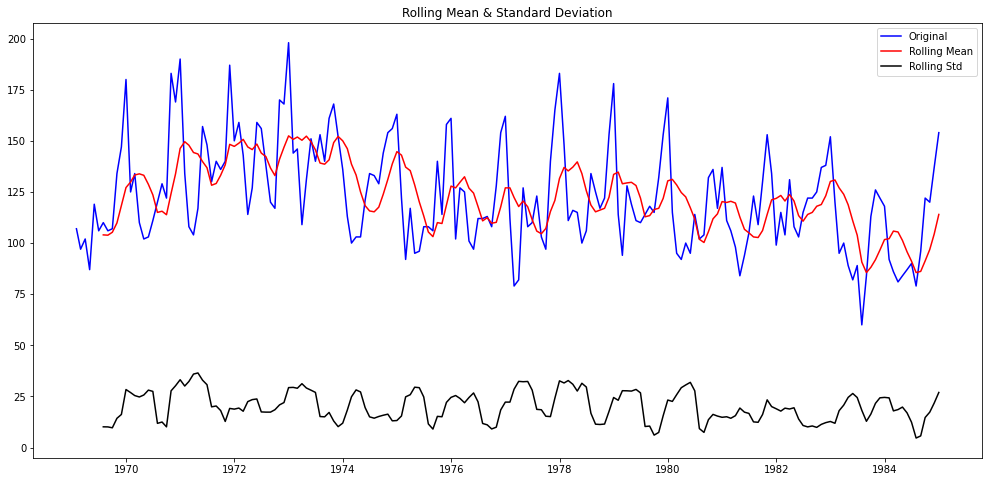

Results of Dickey-Fuller Test:
Test Statistic                  -1.234872
p-value                          0.658418
#Lags Used                      13.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64 



In [38]:
test_stationarity(df['DriversKilled'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

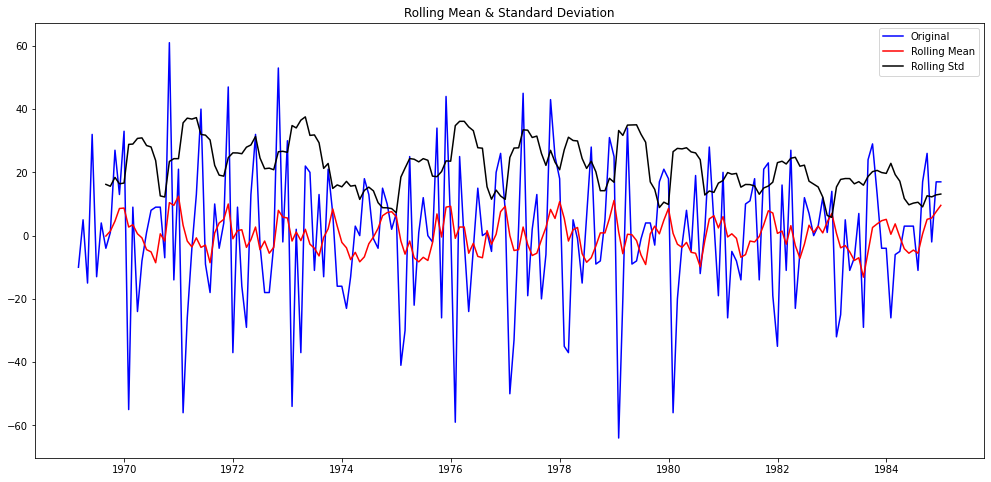

Results of Dickey-Fuller Test:
Test Statistic                -6.030250e+00
p-value                        1.423636e-07
#Lags Used                     1.200000e+01
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64 



In [39]:
test_stationarity(df['DriversKilled'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

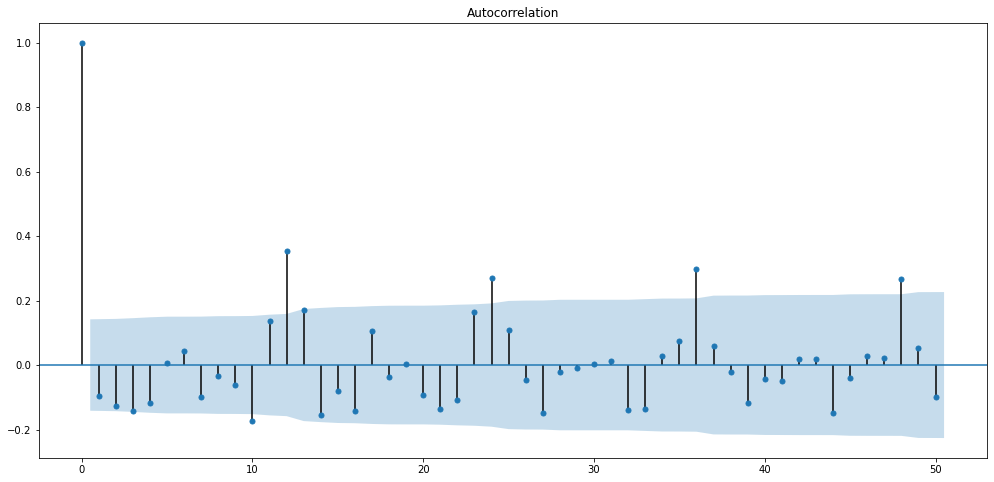

In [41]:
plot_acf(df['DriversKilled'].diff().dropna(),lags=50)
plt.show()

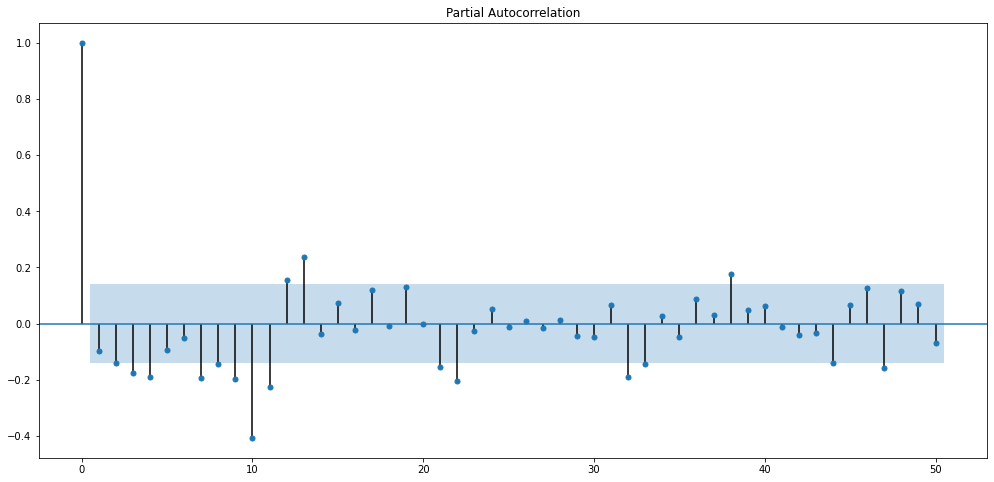

In [42]:
plot_pacf(df['DriversKilled'].diff().dropna(),lags=50)
plt.show()

From the above plots, we can say that there seems to be a seasonality for the $12^{th}$ month or in the month of December.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1979. Test Data is from the beginning of 1979 to the last time stamp provided.

In [43]:
train=df[df.index.year < 1979]
test=df[df.index.year >= 1979]

In [44]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             DriversKilled    kms  PetrolPrice
Time_Stamp                                   
1969-01-31            107   9059     0.102972
1969-02-28             97   7685     0.102363
1969-03-31            102   9963     0.102062
1969-04-30             87  10955     0.100873
1969-05-31            119  11823     0.101020 

Last few rows of Training Data 
             DriversKilled    kms  PetrolPrice
Time_Stamp                                   
1978-08-31            125  18855     0.083601
1978-09-30            117  17243     0.083417
1978-10-31            122  16045     0.082745
1978-11-30            153  14745     0.085235
1978-12-31            178  13726     0.084770 

First few rows of Test Data 
             DriversKilled    kms  PetrolPrice
Time_Stamp                                   
1979-01-31            114  11196     0.084459
1979-02-28             94  12105     0.085352
1979-03-31            128  14723     0.087559
1979-04-30            119

In [45]:
print(train.shape)
print(test.shape)

(120, 3)
(72, 3)


## Check for stationarity of the Training Data Time Series.

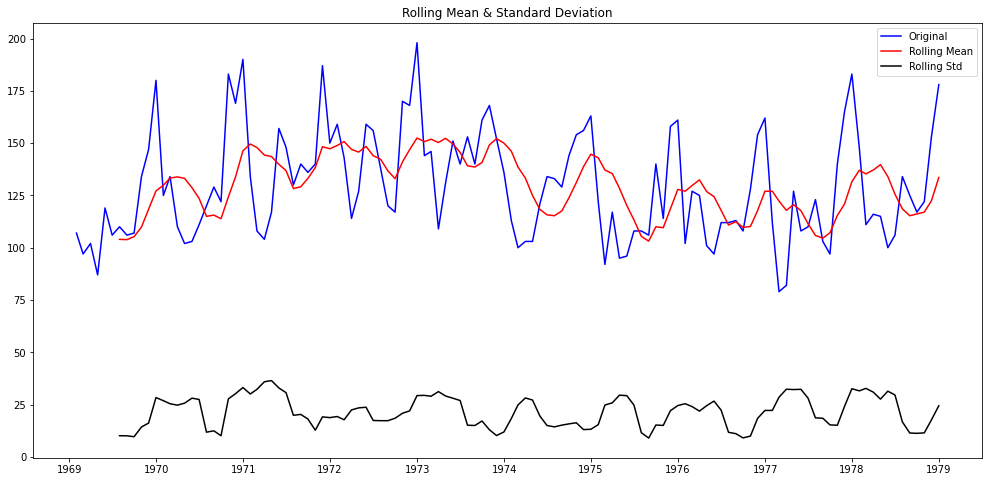

Results of Dickey-Fuller Test:
Test Statistic                  -1.305395
p-value                          0.626701
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [46]:
test_stationarity(train['DriversKilled'])

We see that the series is not stationary at $\alpha$ = 0.05.

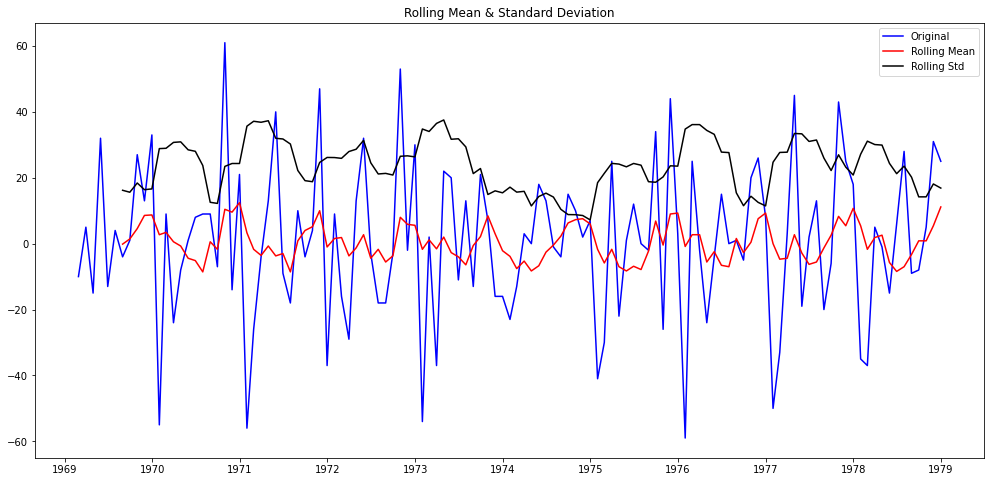

Results of Dickey-Fuller Test:
Test Statistic                -9.521848e+00
p-value                        3.049947e-16
#Lags Used                     1.000000e+01
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64 



In [47]:
test_stationarity(train['DriversKilled'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1969-01-31 to 1978-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DriversKilled  120 non-null    int64  
 1   kms            120 non-null    int64  
 2   PetrolPrice    120 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.8 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [49]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [50]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [51]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['DriversKilled'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1091.9726754540943
ARIMA(0, 1, 1) - AIC:1091.9374601742568
ARIMA(0, 1, 2) - AIC:1080.0279325697309
ARIMA(1, 1, 0) - AIC:1092.4005935251812
ARIMA(1, 1, 1) - AIC:1073.3145115621323
ARIMA(1, 1, 2) - AIC:1074.2884984586603
ARIMA(2, 1, 0) - AIC:1093.5315967710517
ARIMA(2, 1, 1) - AIC:1073.7560644419661
ARIMA(2, 1, 2) - AIC:1059.7329603316084


In [52]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",1059.732960
4,"(1, 1, 1)",1073.314512
7,"(2, 1, 1)",1073.756064
5,"(1, 1, 2)",1074.288498
2,"(0, 1, 2)",1080.027933
1,"(0, 1, 1)",1091.937460
0,"(0, 1, 0)",1091.972675
3,"(1, 1, 0)",1092.400594
6,"(2, 1, 0)",1093.531597


In [53]:
mod = ARIMA(train['DriversKilled'], order=(2,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.DriversKilled   No. Observations:                  119
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.866
Method:                       css-mle   S.D. of innovations             19.356
Date:                Sun, 09 Aug 2020   AIC                           1059.733
Time:                        21:57:43   BIC                           1076.408
Sample:                    02-28-1969   HQIC                          1066.504
                         - 12-31-1978                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3032      0.470      0.645      0.519      -0.618       1.225
ar.L1.D.DriversKilled     1.4879      0.073     20.455      0.000       1.345       1.630
ar.L2.D.

## Predict on the Test Set using this model and evaluate the model.

In [54]:
predicted = results_Arima.forecast(steps=len(test))

In [55]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['DriversKilled'],predicted[0],squared=False)
print(rmse)

43.44921994481713


In [56]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",43.44922


## Building the Full Data for the upcoming 12 Months.

In [57]:
mod = ARIMA(df['DriversKilled'], order=(2,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.DriversKilled   No. Observations:                  191
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -837.380
Method:                       css-mle   S.D. of innovations             19.161
Date:                Sun, 09 Aug 2020   AIC                           1686.760
Time:                        21:57:44   BIC                           1706.273
Sample:                    02-28-1969   HQIC                          1694.663
                         - 12-31-1984                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1510      0.043     -3.526      0.000      -0.235      -0.067
ar.L1.D.DriversKilled     1.2381      0.178      6.944      0.000       0.889       1.588
ar.L2.D.

In [58]:
## Forecast for next 12 months

predicted = results_Arima.predict(start='1985-01-01',end='1986-01-01',typ='levels')

In [59]:
predicted

1985-01-31    135.023361
1985-02-28    119.145497
1985-03-31    108.664715
1985-04-30    103.361211
1985-05-31    101.846870
1985-06-30    102.509847
1985-07-31    104.028595
1985-08-31    105.549610
1985-09-30    106.657898
1985-10-31    107.254102
1985-11-30    107.416720
1985-12-31    107.291180
1986-01-31    107.019417
Freq: M, dtype: float64

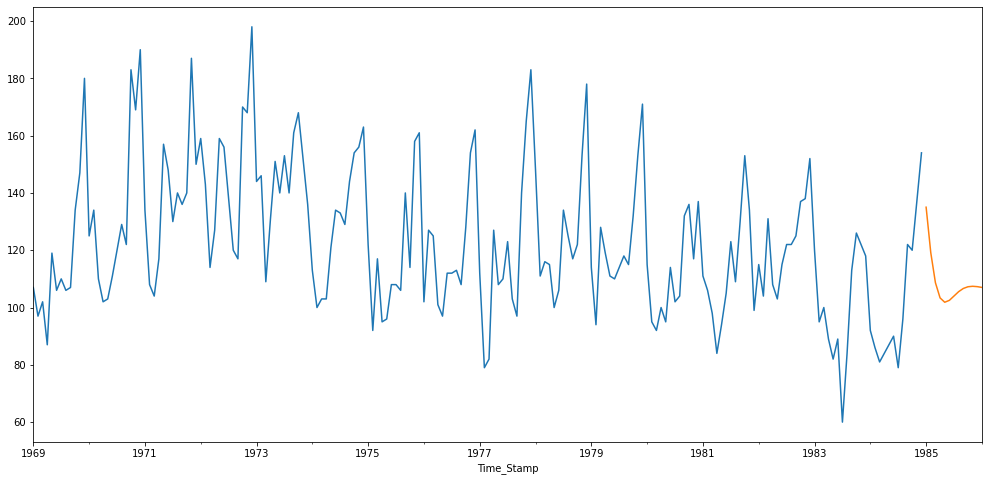

In [60]:
#Plotting the actual Time Series and the forecasted Time Series
df['DriversKilled'].plot()
predicted.plot();

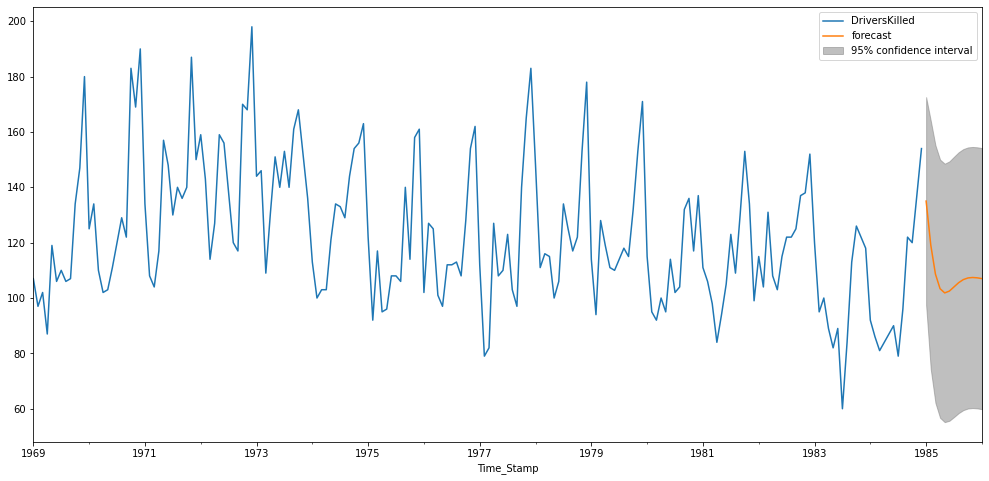

In [61]:
#Plotting the acutal Time Series with the confidence interval

fig, ax = plt.subplots()
ax = df['DriversKilled'].plot(ax=ax)
fig = results_Arima.plot_predict(start='1985-01-01',end='1986-01-01',dynamic=True,plot_insample=False,alpha=0.05,ax=ax);

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [62]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [63]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [64]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['DriversKilled'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1081.7213329066162
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:968.4748171483252
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:850.0714174180549
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:969.2636882529343
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:952.0803168269576
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:841.1179769607363
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:856.611303445195
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:846.6828705810129
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:839.1911832678754
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1073.5366592446383
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:955.6306627706921
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:832.8596773432289
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:949.3600581378757
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:915.8271139366387
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:822.0116480233111
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:834.7837902618672
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:836.5562148006517
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:812.3987495500285
SARIMA(0,

In [65]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",800.874874
53,"(1, 1, 2)","(2, 0, 2, 12)",802.156584
80,"(2, 1, 2)","(2, 0, 2, 12)",804.378007
50,"(1, 1, 2)","(1, 0, 2, 12)",809.035183
44,"(1, 1, 1)","(2, 0, 2, 12)",809.342078


In [66]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['DriversKilled'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -393.437
Date:                            Sun, 09 Aug 2020   AIC                            800.875
Time:                                    21:58:24   BIC                            818.527
Sample:                                         0   HQIC                           808.000
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6055      0.095     -6.400      0.000      -0.791      -0.420
ma.L2         -0.2312      0.109   

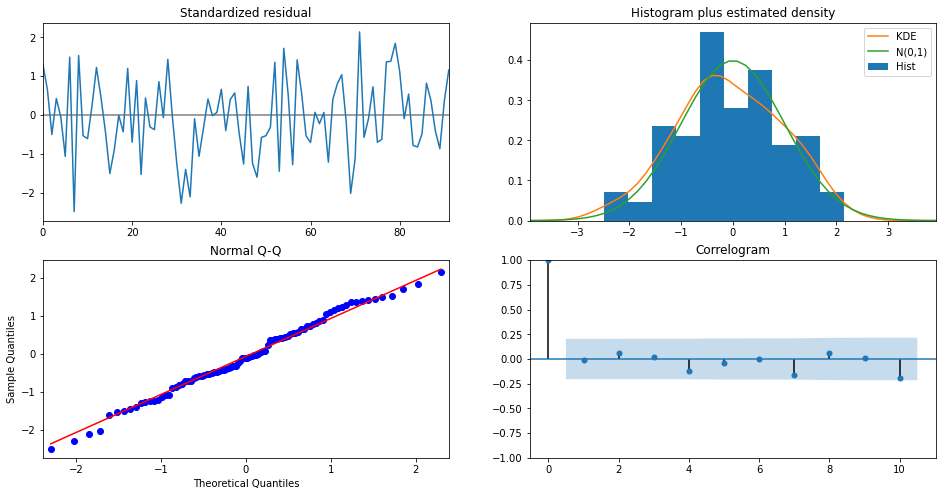

In [67]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [68]:
pred = results_SARIMA.get_forecast(steps=len(test))
pred.predicted_mean

array([136.83765811, 121.51686376, 124.52963588, 116.73139733,
       115.68665418, 120.93651824, 130.28633314, 126.96983331,
       121.96370541, 128.38919235, 146.19220462, 159.55207271,
       131.31726517, 116.20793021, 116.57763546, 124.9503661 ,
       120.00180249, 122.68169481, 129.15360627, 123.23198695,
       125.29875292, 135.94282632, 148.61157614, 155.35784496,
       132.98913996, 123.72160753, 125.62854256, 122.15238592,
       120.73691142, 124.37831942, 131.12938146, 128.16736896,
       125.41822654, 131.02726655, 143.93605272, 153.19121312,
       132.36223231, 121.63885354, 122.16412346, 126.7590034 ,
       123.50035223, 125.71487982, 130.74330393, 126.64546473,
       127.48380644, 134.89421344, 144.6894005 , 150.2780082 ,
       133.29025884, 125.92450393, 127.17707097, 125.76250323,
       124.38389956, 126.96530501, 131.89553025, 129.43643707,
       127.88031852, 132.48231745, 141.93766648, 148.49243067,
       133.05069504, 125.31675492, 125.8351189 , 128.43

In [69]:
pred.summary_frame(alpha=0.05)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,136.837658,16.351676,104.788962,168.886354
1,121.516864,17.570800,87.078728,155.954999
2,124.529636,17.696700,89.844741,159.214531
3,116.731397,17.894468,81.658884,151.803910
4,115.686654,18.090075,80.230758,151.142550
...,...,...,...,...
67,128.939049,42.463131,45.712841,212.165258
68,129.210108,42.824966,45.274716,213.145500
69,134.478287,43.183770,49.839654,219.116920
70,141.969492,43.539616,56.633412,227.305571


In [70]:
rmse = mean_squared_error(test['DriversKilled'],pred.predicted_mean,squared=False)
print(rmse)

25.459363041172747


In [71]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",43.449220
"SARIMA(0, 1, 2)(2, 0, 2, 12)",25.459363


## Building the model on the Full Data for the upcoming 12 Months.

In [72]:
mod = sm.tsa.statespace.SARIMAX(df['DriversKilled'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -686.808
Date:                            Sun, 09 Aug 2020   AIC                           1387.615
Time:                                    21:58:25   BIC                           1409.314
Sample:                                         0   HQIC                          1396.424
                                            - 192                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5546      0.071     -7.798      0.000      -0.694      -0.415
ma.L2         -0.2682      0.072   

In [73]:
pred_full_SARIMA = results_SARIMA.get_forecast(steps=12)

In [74]:
pred_full_SARIMA_date = pd.DataFrame(pred_full_SARIMA.summary_frame())
pred_full_SARIMA_date.head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,114.796960,14.937233,85.520522,144.073398
1,99.287167,16.348580,67.244539,131.329794
2,101.269607,16.532674,68.866160,133.673053
3,97.896946,16.741814,65.083593,130.710298
4,100.563580,16.948374,67.345378,133.781782


In [75]:
pred_full_SARIMA_date = pred_full_SARIMA_date.set_index(pd.date_range(start='1985-01-01',end='1986-01-01', freq='M'))

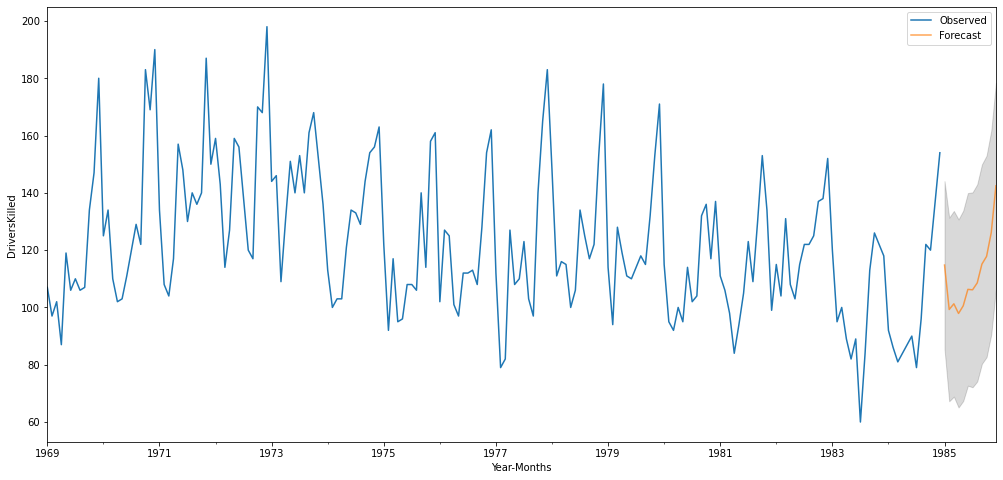

In [76]:
# plot the forecast along with the confidence band

axis = df['DriversKilled'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('DriversKilled')
plt.legend(loc='best')
plt.show()

## Build an Automated version of a SARIMAX [with exogenous variables] model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [77]:
SARIMAX_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMAX_AIC

,param,seasonal,AIC


In [78]:
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['DriversKilled'].values,exog=train[['PetrolPrice','kms']].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit(maxiter=1000)
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        SARIMAX_AIC = SARIMAX_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)

SARIMA(0, 1, 0)(0, 0, 0, 12) - AIC:1082.4304807242204
SARIMA(0, 1, 0)(0, 0, 1, 12) - AIC:970.2556100558852
SARIMA(0, 1, 0)(0, 0, 2, 12) - AIC:852.3159541022346
SARIMA(0, 1, 0)(1, 0, 0, 12) - AIC:971.8510657348388
SARIMA(0, 1, 0)(1, 0, 1, 12) - AIC:954.4521693737497
SARIMA(0, 1, 0)(1, 0, 2, 12) - AIC:845.8231523747746
SARIMA(0, 1, 0)(2, 0, 0, 12) - AIC:859.3930085010019
SARIMA(0, 1, 0)(2, 0, 1, 12) - AIC:851.5928087402281
SARIMA(0, 1, 0)(2, 0, 2, 12) - AIC:842.9771977859327
SARIMA(0, 1, 1)(0, 0, 0, 12) - AIC:1072.3481476590234
SARIMA(0, 1, 1)(0, 0, 1, 12) - AIC:956.658504768263
SARIMA(0, 1, 1)(0, 0, 2, 12) - AIC:837.6607097546246


C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)(1, 0, 0, 12) - AIC:948.7360249266252
SARIMA(0, 1, 1)(1, 0, 1, 12) - AIC:916.4066561899808
SARIMA(0, 1, 1)(1, 0, 2, 12) - AIC:823.659521907311
SARIMA(0, 1, 1)(2, 0, 0, 12) - AIC:836.5667345108758
SARIMA(0, 1, 1)(2, 0, 1, 12) - AIC:837.9019879673327
SARIMA(0, 1, 1)(2, 0, 2, 12) - AIC:813.2768191731318
SARIMA(0, 1, 2)(0, 0, 0, 12) - AIC:1045.7761069351109
SARIMA(0, 1, 2)(0, 0, 1, 12) - AIC:930.9340791286359
SARIMA(0, 1, 2)(0, 0, 2, 12) - AIC:813.6692581175616
SARIMA(0, 1, 2)(1, 0, 0, 12) - AIC:943.2004826569611
SARIMA(0, 1, 2)(1, 0, 1, 12) - AIC:906.4575735232547
SARIMA(0, 1, 2)(1, 0, 2, 12) - AIC:811.0096295671062
SARIMA(0, 1, 2)(2, 0, 0, 12) - AIC:831.4648599094409
SARIMA(0, 1, 2)(2, 0, 1, 12) - AIC:827.561242836202
SARIMA(0, 1, 2)(2, 0, 2, 12) - AIC:800.0614159994443
SARIMA(1, 1, 0)(0, 0, 0, 12) - AIC:1081.7501734263972
SARIMA(1, 1, 0)(0, 0, 1, 12) - AIC:967.7485792703665
SARIMA(1, 1, 0)(0, 0, 2, 12) - AIC:848.3714065160771
SARIMA(1, 1, 0)(1, 0, 0, 12) - AIC:955.8772763

In [79]:
SARIMAX_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",800.061416
53,"(1, 1, 2)","(2, 0, 2, 12)",801.621699
80,"(2, 1, 2)","(2, 0, 2, 12)",803.669175
44,"(1, 1, 1)","(2, 0, 2, 12)",808.685521
71,"(2, 1, 1)","(2, 0, 2, 12)",810.355573


In [80]:
mod = sm.tsa.statespace.SARIMAX(train['DriversKilled'],exog=train[['PetrolPrice','kms']],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=1000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                      DriversKilled   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -391.031
Date:                            Sun, 09 Aug 2020   AIC                            800.061
Time:                                    22:00:17   BIC                            822.758
Sample:                                01-31-1969   HQIC                           809.222
                                     - 12-31-1978                                         
Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PetrolPrice  -849.7793    258.003     -3.294      0.001   -1355.456    -344.102
kms            -0.0027      0.00

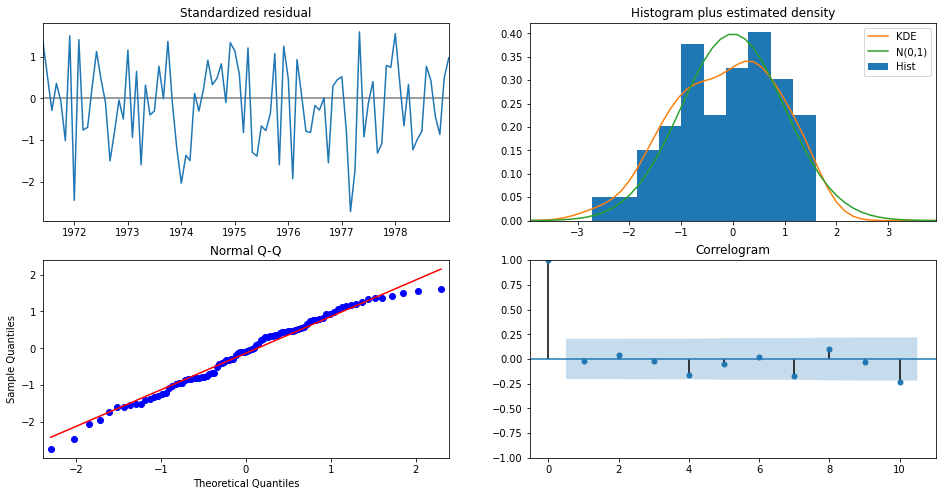

In [81]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [82]:
pred = results.get_forecast(steps=len(test),exog=test[['PetrolPrice','kms']])
pred.predicted_mean

1979-01-31    144.620099
1979-02-28    126.938858
1979-03-31    124.621132
1979-04-30    112.272438
1979-05-31    109.205840
                 ...    
1984-08-31     83.554541
1984-09-30     87.136256
1984-10-31     88.825880
1984-11-30     97.658863
1984-12-31    101.823421
Freq: M, Length: 72, dtype: float64

In [83]:
rmse = mean_squared_error(test['DriversKilled'],pred.predicted_mean,squared=False)
print(rmse)

23.192162073887296


In [84]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMAX(0, 1, 2)(2, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",43.449220
"SARIMA(0, 1, 2)(2, 0, 2, 12)",25.459363
"SARIMAX(0, 1, 2)(2, 0, 2, 12)",23.192162


## Building the model on the Full Data.

In [85]:
mod = sm.tsa.statespace.SARIMAX(df['DriversKilled'],exog=df[['PetrolPrice','kms']],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=1000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                      DriversKilled   No. Observations:                  192
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -683.369
Date:                            Sun, 09 Aug 2020   AIC                           1384.738
Time:                                    22:00:23   BIC                           1412.637
Sample:                                01-31-1969   HQIC                          1396.064
                                     - 12-31-1984                                         
Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PetrolPrice  -359.6430    197.204     -1.824      0.068    -746.155      26.869
kms             0.0028      0.00

## Building a Time Varying Linear Model[TVLM] SARIMA.

In [86]:
mod = sm.tsa.statespace.SARIMAX(train['DriversKilled'],exog=train[['PetrolPrice','kms']],
                                time_varying_regression=True,mle_regression=False,
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=1000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                      DriversKilled   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -400.006
Date:                            Sun, 09 Aug 2020   AIC                            818.013
Time:                                    22:00:26   BIC                            840.511
Sample:                                01-31-1969   HQIC                           827.085
                                     - 12-31-1978                                         
Covariance Type:                              opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ma.L1              -0.5039      0.194     -2.593      0.010      -0.885      -0.123
ma.L2              -

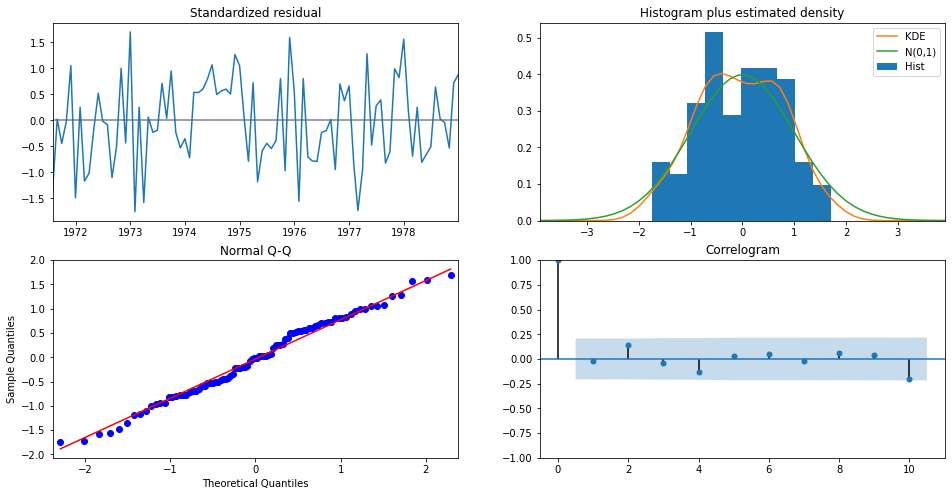

In [87]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [88]:
pred = results.get_forecast(steps=len(test),exog=test[['PetrolPrice','kms']])
pred.predicted_mean

1979-01-31    155.797755
1979-02-28    132.149412
1979-03-31    132.415433
1979-04-30    133.809089
1979-05-31    124.881096
                 ...    
1984-08-31    104.000965
1984-09-30    107.759098
1984-10-31    107.200211
1984-11-30    110.761067
1984-12-31    111.770604
Freq: M, Length: 72, dtype: float64

In [89]:
rmse = mean_squared_error(test['DriversKilled'],pred.predicted_mean,squared=False)
print(rmse)

20.61600638858194


In [90]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMAX_TVLM(0, 1, 2)(2, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",43.449220
"SARIMA(0, 1, 2)(2, 0, 2, 12)",25.459363
"SARIMAX(0, 1, 2)(2, 0, 2, 12)",23.192162
"SARIMAX_TVLM(0, 1, 2)(2, 0, 2, 12)",20.616006


## Building the iterations of the models based on the ACF and PACF plots.

Let us look at the ACF and PACF plots on the training data.

### SARIMA Model

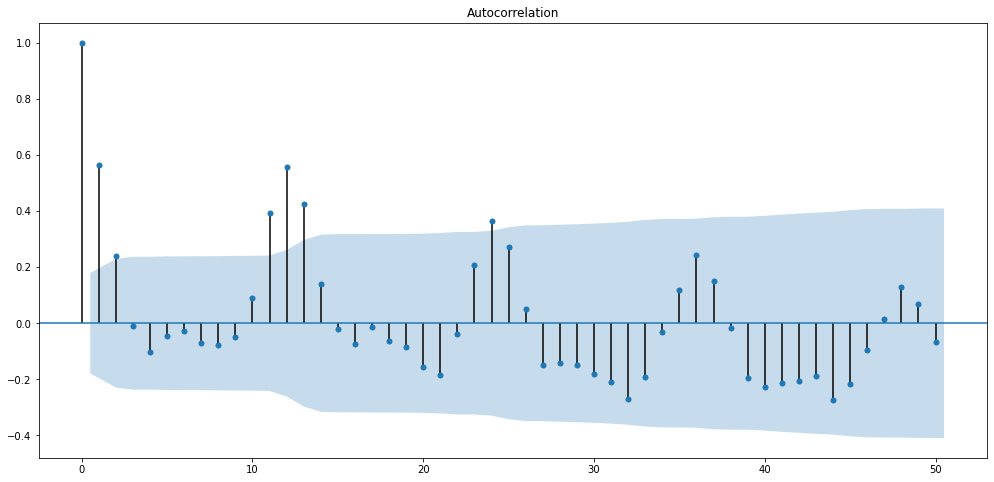

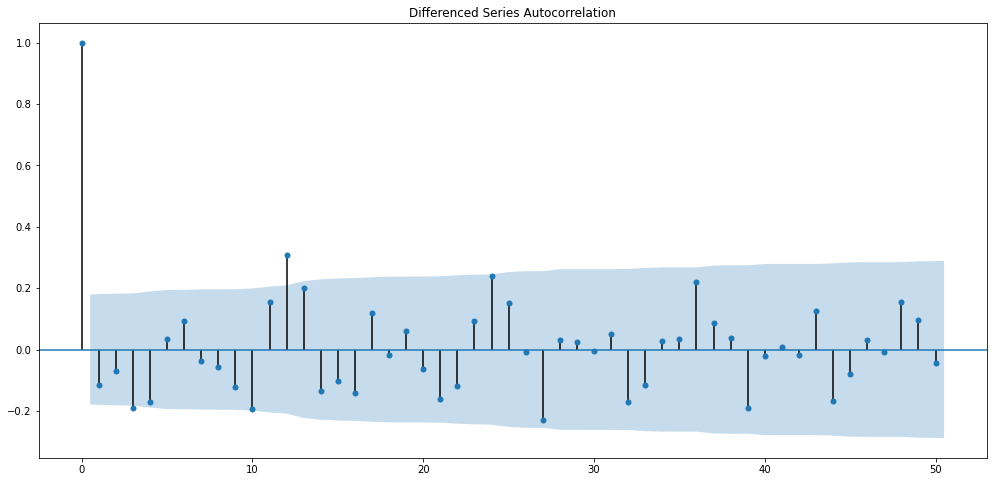

In [91]:
plot_acf(train['DriversKilled'],lags=50)
plot_acf(train['DriversKilled'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

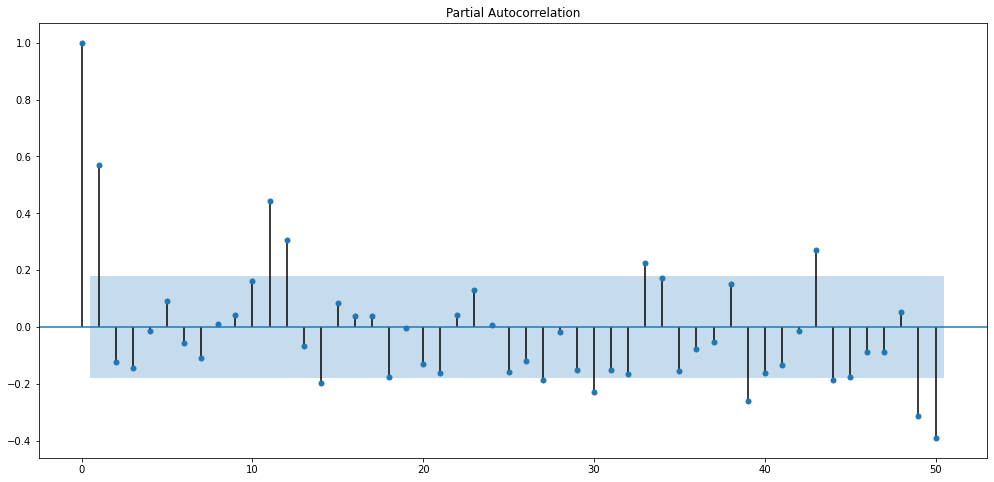

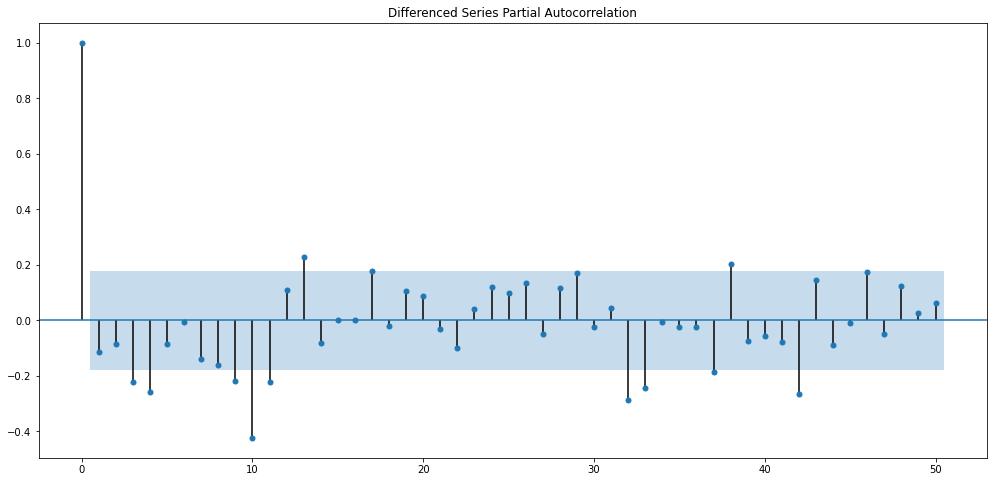

In [92]:
plot_pacf(train['DriversKilled'],lags=50)
plot_pacf(train['DriversKilled'].diff().dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

In [93]:
mod = sm.tsa.statespace.SARIMAX(train['DriversKilled'],freq='M',
                                order=(1,1,1),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=100000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                           DriversKilled   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -397.671
Date:                                 Sun, 09 Aug 2020   AIC                            809.342
Time:                                         22:00:28   BIC                            827.070
Sample:                                     01-31-1969   HQIC                           816.500
                                          - 12-31-1978                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3105      0.126      2.471      0.013       0.064       0

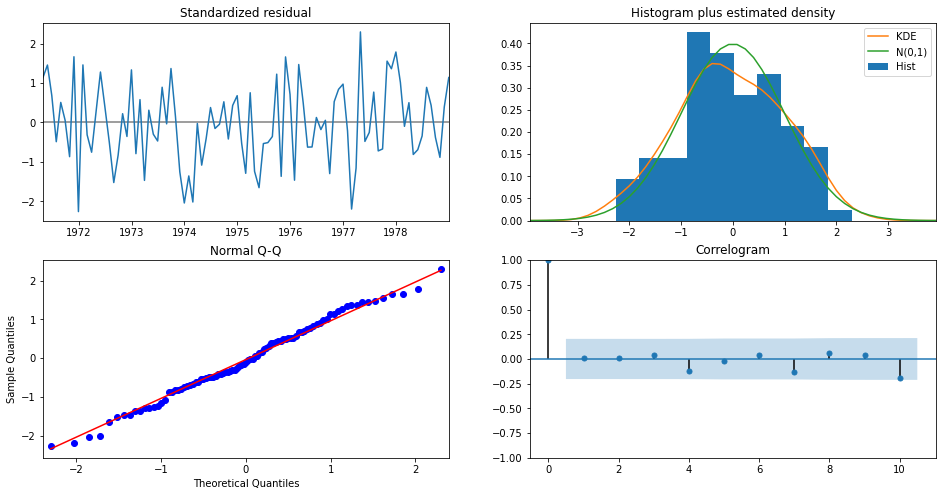

In [94]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [95]:
pred = results.get_forecast(steps=len(test))
pred.predicted_mean

1979-01-31    138.568519
1979-02-28    123.470501
1979-03-31    125.306370
1979-04-30    117.754657
1979-05-31    114.849321
                 ...    
1984-08-31    129.676360
1984-09-30    129.490793
1984-10-31    133.609131
1984-11-30    139.977797
1984-12-31    143.961995
Freq: M, Length: 72, dtype: float64

In [96]:
rmse = mean_squared_error(test['DriversKilled'],pred.predicted_mean,squared=False)
print(rmse)

25.870081134359502


In [97]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 1)(2, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",43.449220
"SARIMA(0, 1, 2)(2, 0, 2, 12)",25.459363
"SARIMAX(0, 1, 2)(2, 0, 2, 12)",23.192162
"SARIMAX_TVLM(0, 1, 2)(2, 0, 2, 12)",20.616006
"SARIMA(1, 1, 1)(2, 0, 2, 12)",25.870081


In [98]:
## Building the model on the whole data


mod = sm.tsa.statespace.SARIMAX(df['DriversKilled'],freq='M',
                                order=(1,1,1),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=1000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                           DriversKilled   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -691.982
Date:                                 Sun, 09 Aug 2020   AIC                           1397.965
Time:                                         22:00:30   BIC                           1419.706
Sample:                                     01-31-1969   HQIC                          1406.791
                                          - 12-31-1984                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3199      0.093      3.422      0.001       0.137       0

In [99]:
pred_full_manual_SARIMA = results.get_forecast(steps=12)

In [100]:
pred_full_manual_SARIMA_date = pd.DataFrame(pred_full_manual_SARIMA.summary_frame())
pred_full_manual_SARIMA_date.head()

DriversKilled,mean,mean_se,mean_ci_lower,mean_ci_upper
1985-01-31,115.411767,15.113730,85.789399,145.034134
1985-02-28,101.593462,16.388827,69.471952,133.714973
1985-03-31,101.221272,16.780512,68.332072,134.110471
1985-04-30,96.991723,16.998966,63.674362,130.309084
1985-05-31,98.471846,17.171602,64.816125,132.127567


In [101]:
pred_full_manual_SARIMA_date = pred_full_SARIMA_date.set_index(pd.date_range(start='1985-01-01',end='1986-01-01', freq='M'))

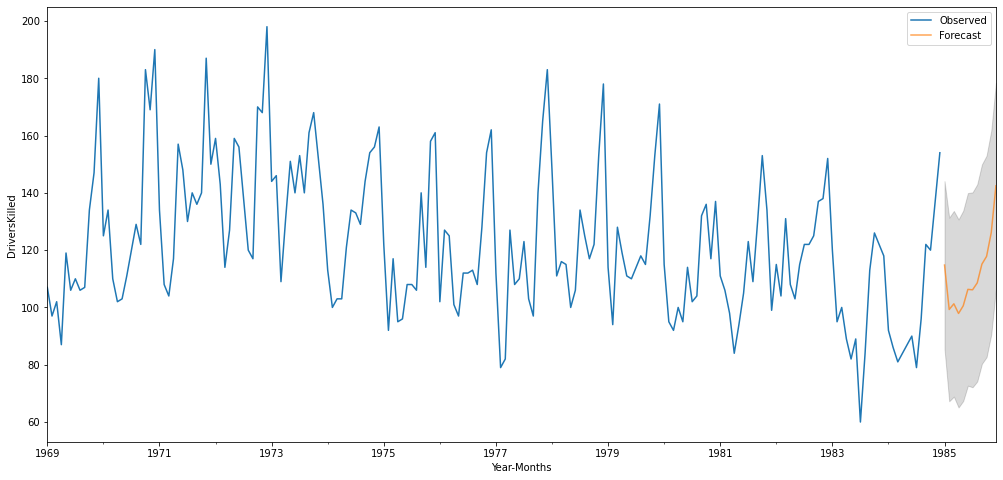

In [102]:
# plot the forecast along with the confidence band

axis = df['DriversKilled'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('DriversKilled')
plt.legend(loc='best')
plt.show()

### SARIMAX Model

In [103]:
mod = sm.tsa.statespace.SARIMAX(train['DriversKilled'],exog=train[['PetrolPrice','kms']],
                                order=(1,1,1),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=1000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                           DriversKilled   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -395.343
Date:                                 Sun, 09 Aug 2020   AIC                            808.686
Time:                                         22:00:32   BIC                            831.479
Sample:                                     01-31-1969   HQIC                           817.889
                                          - 12-31-1978                                         
Covariance Type:                                   opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PetrolPrice  -849.7802    285.321     -2.978      0.003   -1408.998    -

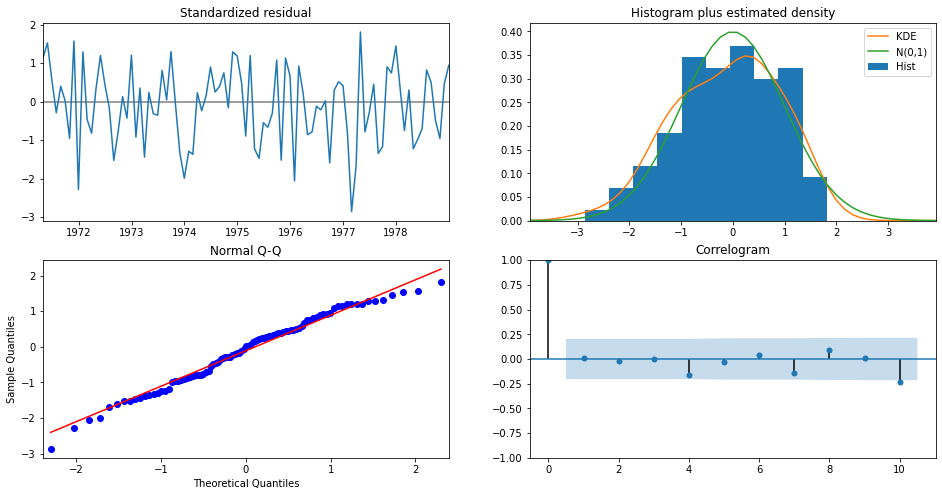

In [104]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [105]:
pred = results.get_forecast(steps=72,exog=test[['PetrolPrice','kms']])
pred.predicted_mean

1979-01-31    146.210919
1979-02-28    128.975821
1979-03-31    125.410721
1979-04-30    112.970721
1979-05-31    108.987840
                 ...    
1984-08-31     83.469399
1984-09-30     87.106712
1984-10-31     88.698347
1984-11-30     97.808034
1984-12-31    102.138398
Freq: M, Length: 72, dtype: float64

In [106]:
rmse = mean_squared_error(test['DriversKilled'],pred.predicted_mean,squared=False)
print(rmse)

23.195558947651527


In [107]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMAX(1, 1, 1)(2, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",43.449220
"SARIMA(0, 1, 2)(2, 0, 2, 12)",25.459363
"SARIMAX(0, 1, 2)(2, 0, 2, 12)",23.192162
"SARIMAX_TVLM(0, 1, 2)(2, 0, 2, 12)",20.616006
"SARIMA(1, 1, 1)(2, 0, 2, 12)",25.870081
"SARIMAX(1, 1, 1)(2, 0, 2, 12)",23.195559


### SARIMAX_TVLM Model

In [108]:
mod = sm.tsa.statespace.SARIMAX(train['DriversKilled'],exog=train[['PetrolPrice','kms']],
                                time_varying_regression=True,mle_regression=False,
                                order=(1,1,1),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=1000)
print(results.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                        SARIMAX Results                                        
Dep. Variable:                           DriversKilled   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -402.888
Date:                                 Sun, 09 Aug 2020   AIC                            823.777
Time:                                         22:00:37   BIC                            846.374
Sample:                                     01-31-1969   HQIC                           832.893
                                          - 12-31-1978                                         
Covariance Type:                                   opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1               0.5424      0.165      3.278      0.001     

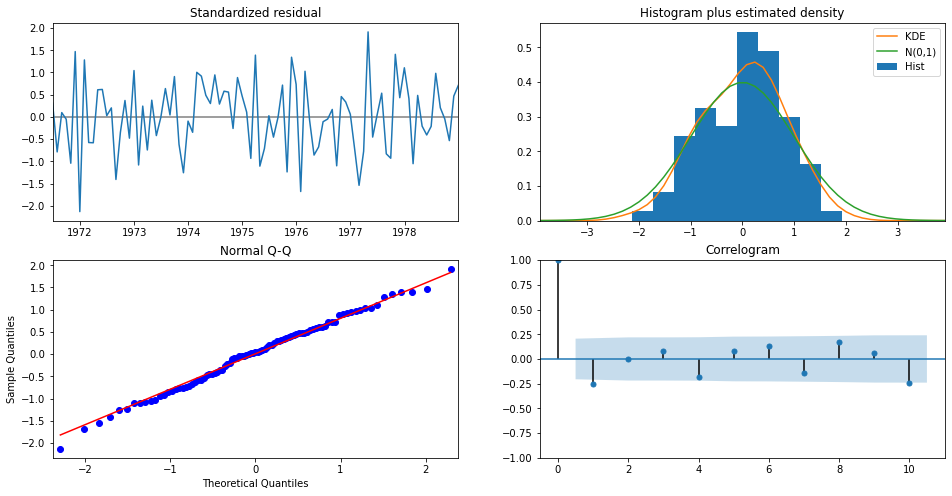

In [109]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [110]:
pred = results.get_forecast(steps=len(test),exog=test[['PetrolPrice','kms']])
pred.predicted_mean

1979-01-31    148.248758
1979-02-28    121.143733
1979-03-31    119.621852
1979-04-30    127.326404
1979-05-31    114.793604
                 ...    
1984-08-31    103.145896
1984-09-30    105.071733
1984-10-31    107.903613
1984-11-30    118.678663
1984-12-31    124.464974
Freq: M, Length: 72, dtype: float64

In [111]:
rmse = mean_squared_error(test['DriversKilled'],pred.predicted_mean,squared=False)
print(rmse)

18.329480058736547


In [112]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMAX_TVLM(1, 1, 1)(2, 0, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",43.449220
"SARIMA(0, 1, 2)(2, 0, 2, 12)",25.459363
"SARIMAX(0, 1, 2)(2, 0, 2, 12)",23.192162
"SARIMAX_TVLM(0, 1, 2)(2, 0, 2, 12)",20.616006
"SARIMA(1, 1, 1)(2, 0, 2, 12)",25.870081
"SARIMAX(1, 1, 1)(2, 0, 2, 12)",23.195559
"SARIMAX_TVLM(1, 1, 1)(2, 0, 2, 12)",18.329480


# END